In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SVM on Digits Data Set

In [2]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target % 2, random_state=2)

In [3]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.9177777777777778

In [4]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [5]:
#print(accuracy_score(y_test, y_pred_pca))    
grid_search.score(X_test, y_test)

0.98666666666666669

### Non Binary Case

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=2)

In [7]:
from sklearn.svm import LinearSVC, SVC

svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.42888888888888888

In [8]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.grid_search import GridSearchCV

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [9]:
grid_search.score(X_test, y_test)

0.97999999999999998

# A Simple Linear Example

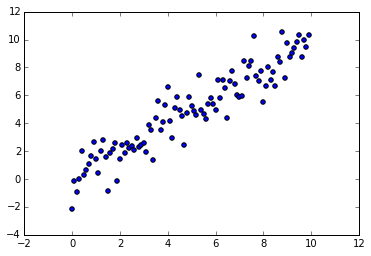

In [15]:
x = np.arange(0,10,.1)
y = x + np.random.normal(loc=0.0, scale=1.0, size=len(x))
plt.scatter(x,y)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca_x = pca.fit(zip(x,y)).transform(zip(x,y))

explained variance ratio: [ 0.97561708  0.02438292]


(-2, 12)

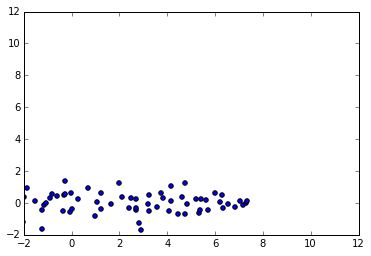

In [56]:

# Percentage of variance explained for each components
print('explained variance ratio: %s'% str(pca.explained_variance_ratio_))

plt.scatter(pca_x[:, 0], pca_x[:, 1])
plt.xlim(-2,12)
plt.ylim(-2,12)

# Digits Again

In [62]:
sum(estimator.explained_variance_ratio_)

1.0000000000000002

explained variance ratio: [  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.048

<Container object of 64 artists>

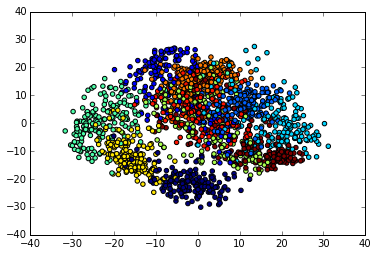

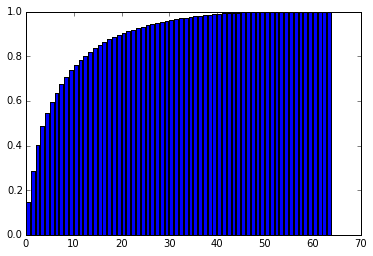

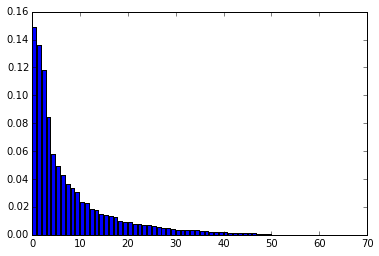

In [69]:
from sklearn.decomposition import PCA
estimator = PCA()
X_pca = estimator.fit_transform(digits.data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)
print('explained variance ratio: %s'% str(estimator.explained_variance_ratio_))

plt.figure()
total_variance = sum(estimator.explained_variance_)
varaince_explaned = [1.0*i/total_variance for i in estimator.explained_variance_]
cummulative_variance = np.cumsum(varaince_explaned)
plt.bar(range(len(estimator.explained_variance_)), cummulative_variance)

plt.figure()
plt.bar(range(len(estimator.explained_variance_)), varaince_explaned)


# PCA on the Iris Data Set













explained variance ratio: [ 0.92461621  0.05301557  0.01718514  0.00518309]


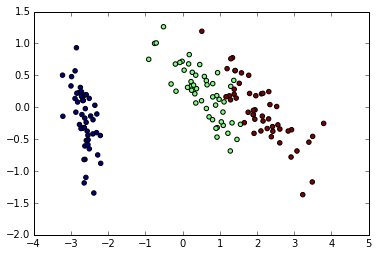

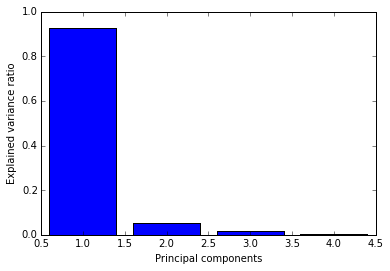

In [74]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
estimator = PCA()
X_pca = estimator.fit_transform(iris.data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
print('explained variance ratio: %s'% str(estimator.explained_variance_ratio_))


plt.figure()
total_variance = sum(estimator.explained_variance_)
varaince_explaned = [1.0*i/total_variance for i in estimator.explained_variance_]
cummulative_variance = np.cumsum(varaince_explaned)
plt.bar(range(1,5), varaince_explaned, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')


# Non Linear PCA, Kernel PCA

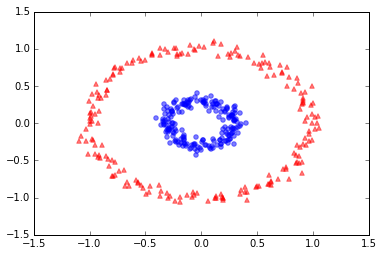

In [84]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)

explained variance ratio: [ 0.50362959  0.49637041]


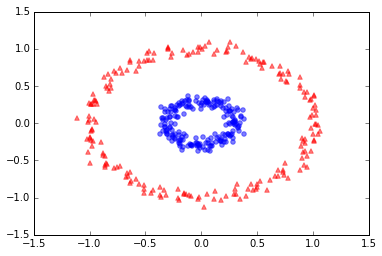

In [85]:
estimator = PCA()
X_pca = estimator.fit_transform(X)
print('explained variance ratio: %s'% str(estimator.explained_variance_ratio_))

plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1],color='blue', marker='o', alpha=0.5)

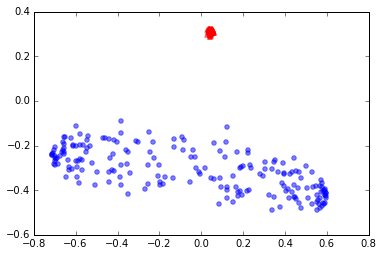

In [86]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
#X_back = kpca.inverse_transform(X_kpca)


plt.figure()
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)

# Non-linear PCA on Moons

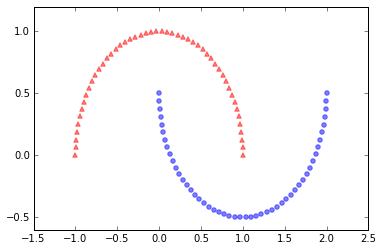

In [91]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)

explained variance ratio: [ 0.81968748  0.18031252]


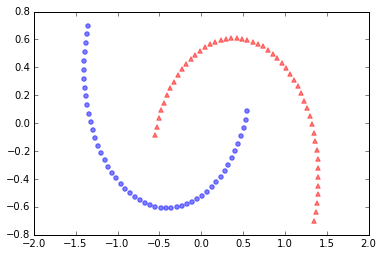

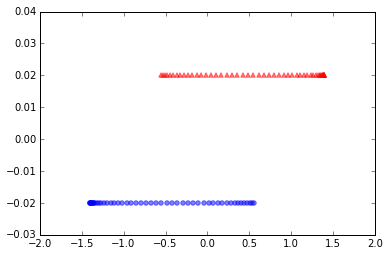

In [102]:
estimator = PCA()
X_pca = estimator.fit_transform(X)
print('explained variance ratio: %s'% str(estimator.explained_variance_ratio_))

plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1],color='blue', marker='o', alpha=0.5)

plt.figure()
plt.scatter(X_pca[y==0, 0], np.zeros((50,1))+0.02,  color='red', marker='^', alpha=0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)


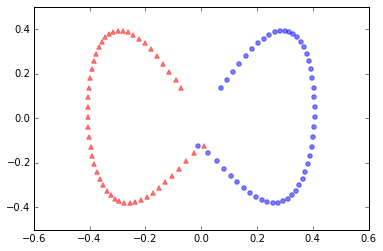

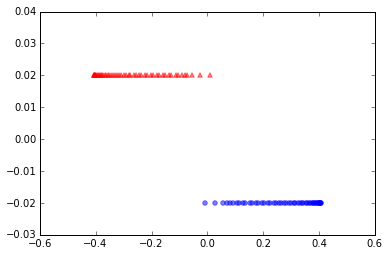

In [106]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
#X_back = kpca.inverse_transform(X_kpca)

plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)


plt.figure()
plt.scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,  color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)


# S Curve Example

In [74]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

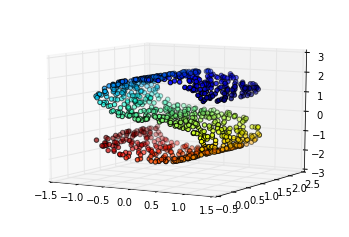

In [77]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection = '3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(10, -60)

explained variance ratio: [ 0.6990848   0.17715725]


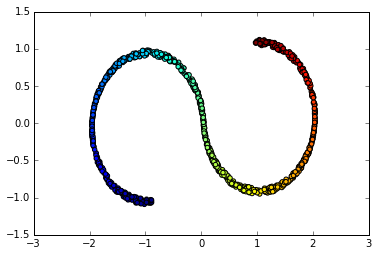

In [83]:
pca = PCA(n_components=2).fit(X)
pca_x = pca.transform(X)
plt.scatter(pca_x[:,0], pca_x[:,1], c=y)

print('explained variance ratio: %s'% str(pca.explained_variance_ratio_))

# Eigenfaces and SVMs

In [109]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [110]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [111]:
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

In [112]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [113]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [115]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, X_train.shape[0]))

Extracting the top 150 eigenfaces from 966 faces


In [116]:
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [117]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [118]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Projecting the input data on the eigenfaces orthonormal basis


In [119]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='auto'), param_grid)

clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.005, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)


In [120]:
print("Predicting people's names on the test set")

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.56      0.69        18
     Colin Powell       0.80      0.84      0.82        51
  Donald Rumsfeld       0.96      0.84      0.90        32
    George W Bush       0.83      0.94      0.88       144
Gerhard Schroeder       0.95      0.72      0.82        29
      Hugo Chavez       1.00      0.86      0.92        14
       Tony Blair       0.90      0.82      0.86        34

      avg / total       0.87      0.86      0.86       322

[[ 10   3   0   5   0   0   0]
 [  0  43   0   7   0   0   1]
 [  0   1  27   3   0   0   1]
 [  1   6   1 136   0   0   0]
 [  0   1   0   6  21   0   1]
 [  0   0   0   2   0  12   0]
 [  0   0   0   5   1   0  28]]


In [121]:
###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

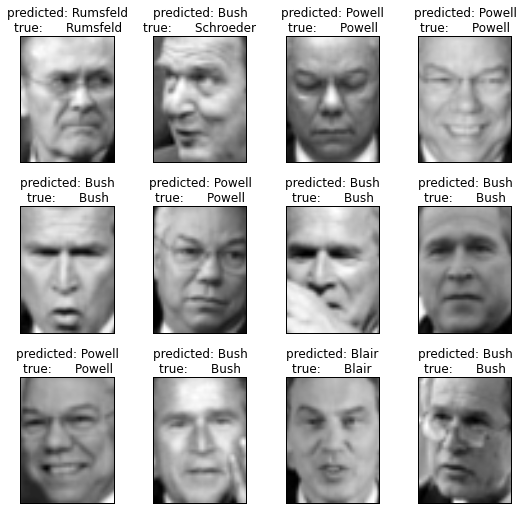

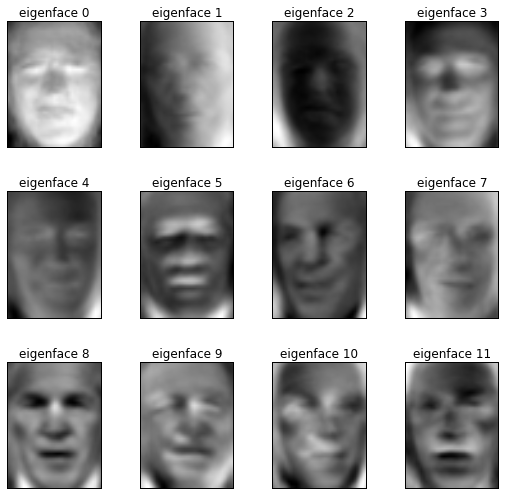

In [122]:
prediction_titles = [title(y_pred, y_test, target_names, i)for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)